In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data_path = "/content/drive/MyDrive"
expression_data = pd.read_csv(f"{data_path}/immune_cells_data.csv", index_col=0)
expression_data.head()

,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
0,33.888550,38.384340,0.044721,1.385159,11.341853,105.193306,26.463990,0.000000,1.537873,27.645407,...,21.332443,1.397932,0.000000,23.136585,0.001902,60.218548,6.307399,9.577274,44.026940,B_cell
1,16.497124,35.054090,0.314645,4.329797,8.649321,50.577618,16.684614,0.000000,1.796609,13.715611,...,1.199440,159.147130,0.259244,18.986986,0.310971,25.818224,4.193348,14.181196,35.779896,B_cell
2,5.449933,31.783958,0.002949,2.137536,1.750892,109.201050,35.265984,0.011501,0.878889,19.361662,...,0.002924,25.256378,0.000000,32.941895,0.000000,99.555990,8.323141,29.321960,30.816538,B_cell
3,33.362240,56.147026,0.037295,1.604904,6.807299,100.141620,25.446817,0.000000,2.502661,12.745437,...,0.000000,14.509516,0.063003,19.036896,0.000000,49.394980,4.655794,17.683067,47.143270,B_cell
4,50.188510,30.165264,0.039678,1.501439,1.619954,46.916790,28.053373,0.018181,1.165164,30.318027,...,0.033807,93.681190,0.031816,19.094831,0.000000,20.201437,6.935232,20.769829,53.935143,B_cell


In [5]:
b_cells_expression_data = expression_data.query("Cell_type == 'B_cell'")
nk_cells_expression_data = expression_data.query("Cell_type == 'NK_cell'")

##Задание 1

In [7]:
example_gene = "TMCC1"

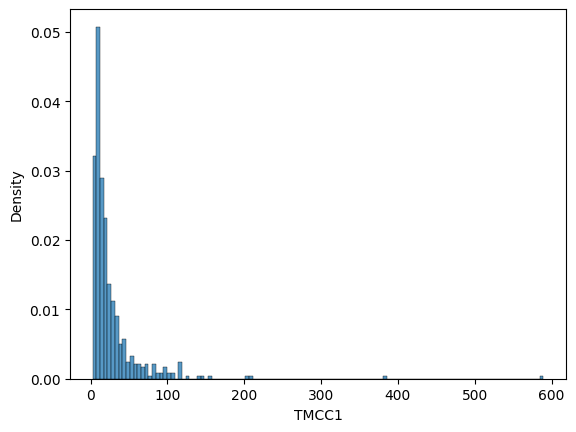

In [8]:
sns.histplot(b_cells_expression_data[example_gene], stat="density");

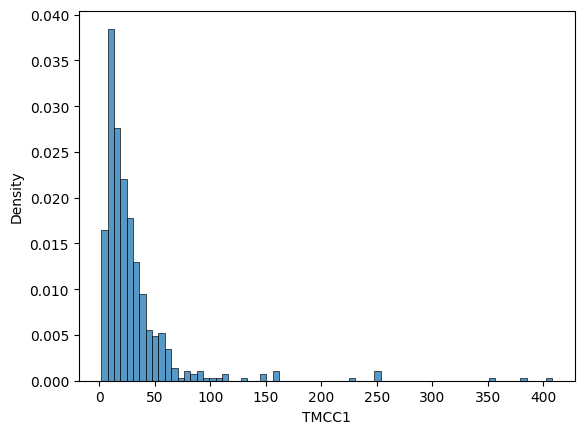

In [9]:
sns.histplot(nk_cells_expression_data[example_gene], stat="density");

In [11]:
b_expressions = b_cells_expression_data[example_gene]
nk_expressions = nk_cells_expression_data[example_gene]
sample_size = 100
n_samples = 200

In [25]:
#Напишите функцию, которая будет принимать на вход экспрессии гена,
#семплировать их них выборки размера sample_size,
#считать среднюю экспрессию и повторять это n_samples раз.
#Примените эту функцию к экспрессиям гена TMCC1 в обоих клеточных типах, визуализируйте их.
#Отличаются ли средние экспрессии данного гена у этих клеточных типов?



def demonstrate_clt(expressions, sample_size=sample_size, n_samples=n_samples):
    mean_expressions = []
    for _ in range(n_samples):
      sample_size_samples  = np.random.choice(expressions, size=sample_size)
      mean = np.mean(sample_size_samples)
      mean_expressions.append(mean)

    return mean_expressions

In [28]:
demonstrate_clt(b_expressions).__len__()

200

In [30]:
demonstrate_clt(nk_expressions)[:5]

[33.616230638,
 28.204065305000004,
 31.105112842999997,
 25.72435456,
 31.328172678999998]

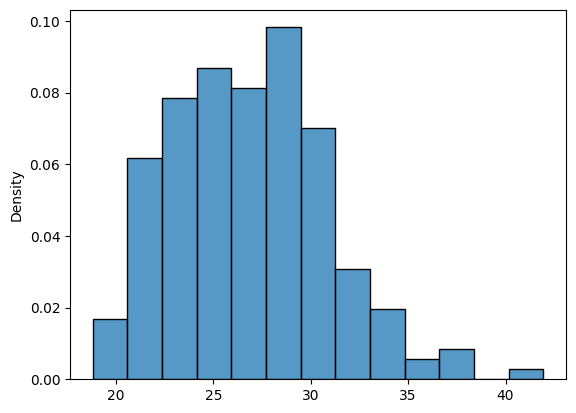

In [31]:
sns.histplot(demonstrate_clt(b_expressions), stat="density");

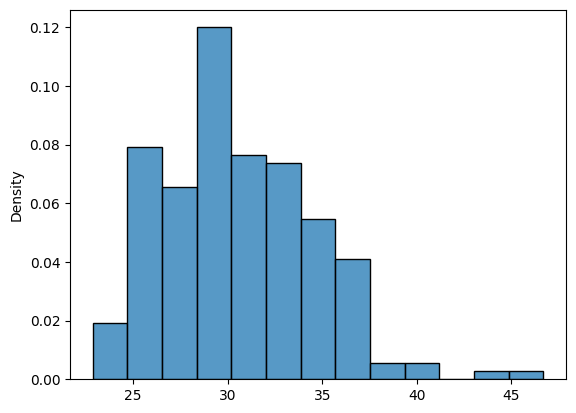

In [32]:
sns.histplot(demonstrate_clt(nk_expressions), stat="density");

In [ ]:
#А теперь посчитайте 95% доверительные интервалы для обоих распределений
#(примем тот факт, что средние распределены нормально для обоих клеточных типов)
#и скажите, отличается ли средняя экспрессия данного гена между клеточными типами?

In [35]:
b_exp_list = np.array(demonstrate_clt(b_expressions))
nk_exp_list = np.array(demonstrate_clt(nk_expressions))

In [38]:
b_mu = b_exp_list.mean()
b_sigma = b_exp_list.std()

b_mu, b_sigma

(26.93138536422, 3.9701147827130097)

In [39]:
nk_mu = nk_exp_list.mean()
nk_sigma = nk_exp_list.std()

nk_mu, nk_sigma

(30.28663537219, 4.2649647178787236)

In [40]:
b_se = b_sigma / np.sqrt(sample_size)
nk_se = nk_sigma / np.sqrt(sample_size)

b_se, nk_se

(0.39701147827130095, 0.42649647178787237)

In [53]:
mean_b_exp_list = b_exp_list.mean()
b_exp_left_b = mean_b_exp_list - 1.96 * b_se
b_exp_right_b = mean_b_exp_list + 1.96 * b_se

mean_nk_exp_list = nk_exp_list.mean()
nk_exp_left_b = mean_nk_exp_list - 1.96 * nk_se
nk_exp_right_b = mean_nk_exp_list + 1.96 * nk_se

print(f"b : left - {b_exp_left_b:.3f} and right - {b_exp_right_b:.3f}\nnk : left - {nk_exp_left_b:.3f} and right - {nk_exp_right_b:.3f}")

b : left - 26.153 and right - 27.710
nk : left - 29.451 and right - 31.123


Два непересекающихся массива вышло

##Задание 2

In [ ]:
#Вспомнили центральную предельную теорему и то, как считать доверительные интервалы в простом случае,
#теперь давайте воспользуемся библиотечной реализацией для того, чтобы протестировать уже все гены.

In [54]:
import scipy.stats as st

In [ ]:
#*_expressions = *_cells_expression_data[example_gene]

In [66]:
# B клетки
st.t.interval(confidence=0.95, # 95% доверительный интервал
              df=len(b_expressions) - 1, # число степеней свободы - 1
              loc=np.mean(b_expressions), # Среднее
              scale=st.sem(b_expressions)) # Стандартная ошибка среднего

(23.420272072079296, 30.53767158632071)

In [67]:
# NK клетки
st.t.interval(confidence=0.95, # 95% доверительный интервал
              df=len(nk_expressions) - 1, # число степеней свободы - 1
              loc=np.mean(nk_expressions), # Среднее
              scale=st.sem(nk_expressions)) # Стандартная ошибка среднего

(26.84610468807562, 34.01653451272438)

In [68]:
# B клетки
b_exp_left_b_st, b_exp_right_b_st = st.t.interval(confidence=0.95, # 95% доверительный интервал
                                            df=len(b_expressions) - 1, # число степеней свободы - 1
                                            loc=np.mean(b_expressions), # Среднее
                                            scale=st.sem(b_expressions)) # Стандартная ошибка среднего

nk_exp_left_b_st, nk_exp_right_b_st = st.t.interval(confidence=0.95, # 95% доверительный интервал
                                              df=len(nk_expressions) - 1, # число степеней свободы - 1
                                              loc=np.mean(nk_expressions), # Среднее
                                              scale=st.sem(nk_expressions)) # Стандартная ошибка среднего

b_exp_left_b_st, b_exp_right_b_st, nk_exp_left_b_st, nk_exp_right_b_st

(23.420272072079296, 30.53767158632071, 26.84610468807562, 34.01653451272438)

In [74]:
def check_intervals_intersect(left_ci_1, right_ci_1, left_ci_2, right_ci_2):
    are_intersect = []
    if (left_ci_1 < left_ci_2 and left_ci_2 < right_ci_1) or (left_ci_1 < right_ci_2 and right_ci_2 < right_ci_1):
      are_intersect.append(True)
    else:
      are_intersect.append(False)
    return are_intersect # True or False

In [75]:
check_intervals_intersect(b_exp_left_b_st, b_exp_right_b_st, nk_exp_left_b_st, nk_exp_right_b_st)

[True]

In [77]:
b_cells_expression_data.columns

Index(['TMCC1', 'RANBP3', 'GABRG3', 'ARRDC5', 'LRP3', 'TIMM23', 'TBPL1',
       'BIRC8', 'TTC28', 'C19orf66',
       ...
       'MAGEA6', 'IL4I1', 'LCN12', 'SMG6', 'C1orf100', 'WDR75', 'ZBTB26',
       'SPTY2D1', 'PLEKHA2', 'Cell_type'],
      dtype='object', length=18793)

In [87]:
def each_gene_ci(data1, data2):
  ci_test_results = []
  for _ in range(len(data1)):
    #B клетки
    gene_expression_1 = data1[data1.columns[_]]
    # B клетки
    left_1, right_1 = st.t.interval(confidence=0.95, # 95% доверительный интервал
                                df=len(gene_expression_1) - 1, # число степеней свободы - 1
                                loc=np.mean(gene_expression_1), # Среднее
                                scale=st.sem(gene_expression_1)) # Стандартная ошибка среднего
    #nk клетки
    gene_expression_2 = data2[data2.columns[_]]
    # B клетки
    left_2, right_2 = st.t.interval(confidence=0.95, # 95% доверительный интервал
                                df=len(gene_expression_2) - 1, # число степеней свободы - 1
                                loc=np.mean(gene_expression_2), # Среднее
                                scale=st.sem(gene_expression_2)) # Стандартная ошибка среднего


    def check_intervals_intersect(left_ci_1, right_ci_1, left_ci_2, right_ci_2):
      are_intersect = []
      if (left_ci_1 < left_ci_2 and left_ci_2 < right_ci_1) or (left_ci_1 < right_ci_2 and right_ci_2 < right_ci_1):
        are_intersect.append(True)
      else:
        are_intersect.append(False)
      return are_intersect # True or False

    ci_test_results.append(check_intervals_intersect(left_1, right_1, left_2, right_2))
  return ci_test_results # True or False

In [89]:
ci_test_results = each_gene_ci(b_cells_expression_data, nk_cells_expression_data)

In [90]:
ci_test_results

[[True],
 [False],
 [True],
 [False],
 [True],
 [False],
 [True],
 [True],
 [True],
 [False],
 [True],
 [True],
 [False],
 [False],
 [True],
 [True],
 [True],
 [True],
 [True],
 [False],
 [True],
 [True],
 [True],
 [True],
 [True],
 [True],
 [True],
 [True],
 [True],
 [False],
 [True],
 [False],
 [False],
 [False],
 [True],
 [False],
 [True],
 [False],
 [True],
 [True],
 [True],
 [True],
 [True],
 [True],
 [True],
 [False],
 [True],
 [True],
 [True],
 [True],
 [True],
 [False],
 [False],
 [True],
 [False],
 [True],
 [False],
 [True],
 [True],
 [True],
 [True],
 [True],
 [True],
 [True],
 [True],
 [True],
 [False],
 [False],
 [False],
 [False],
 [False],
 [True],
 [False],
 [False],
 [False],
 [True],
 [False],
 [True],
 [True],
 [True],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [False],
 [True],
 [False],
 [True],
 [False],
 [True],
 [True],
 [True],
 [True],
 [True],
 [True],
 [True],
 [True],
 [False],
 [False],
 [True],
 [True],
 [True],
 [True],
 [True],
 [True],

##Задание 3

In [ ]:
#Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями
#и выдавать для каждого гена,значимо ли отличается его средняя экспрессия между клеточными типами.

In [91]:
from statsmodels.stats.weightstats import ztest

In [96]:
# Наш излюбленный ген
ztest(
    b_cells_expression_data[example_gene],
    nk_cells_expression_data[example_gene]
)

(-1.3427434041885127, 0.17935507499860204)

In [101]:
def check_dge_with_ztest(data1, data2):
    # dge - differential gene expression
    z_test_results = []
    for _ in range(len(data1)):
      #B клетки
      gene_expression_1 = data1[data1.columns[_]]
      gene_expression_2 = data2[data2.columns[_]]
      _, p_value_by_gene = ztest(
                              gene_expression_1,
                              gene_expression_2
                              )
      if p_value_by_gene < 0.05:
        z_test_results.append(True)
      else:
        z_test_results.append(False)
    return z_test_results
z_test_results = check_dge_with_ztest(b_cells_expression_data, nk_cells_expression_data)

In [102]:
z_test_results = check_dge_with_ztest(b_cells_expression_data, nk_cells_expression_data)

In [104]:
z_test_results

[False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 Fa

##Задание 4

In [ ]:
#Теперь пришла пора оформить все ваши старания в виде программы.
#Напишите программу (можно просто функцию), которая принимает на вход следующие аргуметры:

#first_cell_type_expressions – таблица с экспрессиями генов для одного клеточного типа;
#second_cell_type_expressions – таблица с экспрессиями генов для второго клеточного типа;

#Как читать данные при помощи пандаса мы уже знаем, осталось понять, как записывать результаты.
#Допустим, вы записывали результаты ваших тестов в списки, тогда создать пандасовский датафрейм можно следующим образом:

In [ ]:
ci_test_results = [True, False, True]
z_test_results = [True, True, True]
# Опционально можно также сохранять p-value для z-критерия
z_test_p_values = [0.004, 0.01, 0.0001]
# Также сохраните разницу в средних экспрессиях между 1 и 2 таблицами для каждого гена,
# чтобы было понять, уменьшается или увеличивается экспрессия гена
mean_diff = [-10, 10, 0.5]

# Созданим словарь {'название колонки': список_значений}
results = {
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff
}

# Из словаря делаем датафрейм
results = pd.DataFrame(results)
results.head()

# Сохраним таблицу в .csv файл
results.to_csv("path_to_your_awesome_results.csv")

In [113]:
def de_calculations(data1, data2):
  def each_gene_ci(data1, data2):
    ci_test_results = []
    mean_diff = []
    for _ in range(len(data1)):
      #B клетки
      gene_expression_1 = data1[data1.columns[_]]
      # B клетки
      left_1, right_1 = st.t.interval(confidence=0.95, # 95% доверительный интервал
                                    df=len(gene_expression_1) - 1, # число степеней свободы - 1
                                    loc=np.mean(gene_expression_1), # Среднее
                                    scale=st.sem(gene_expression_1)) # Стандартная ошибка среднего
      mean_1 = np.mean(gene_expression_1)
      #nk клетки
      gene_expression_2 = data2[data2.columns[_]]
      # B клетки
      left_2, right_2 = st.t.interval(confidence=0.95, # 95% доверительный интервал
                                    df=len(gene_expression_2) - 1, # число степеней свободы - 1
                                    loc=np.mean(gene_expression_2), # Среднее
                                    scale=st.sem(gene_expression_2)) # Стандартная ошибка среднего
      mean_2 = np.mean(gene_expression_2)
      mean_diff.append(mean_1 - mean_2)

      def check_intervals_intersect(left_ci_1, right_ci_1, left_ci_2, right_ci_2):
        are_intersect = []
        if (left_ci_1 < left_ci_2 and left_ci_2 < right_ci_1) or (left_ci_1 < right_ci_2 and right_ci_2 < right_ci_1):
          are_intersect.append(True)
        else:
          are_intersect.append(False)
        return are_intersect # True or False

      ci_test_results.append(check_intervals_intersect(left_1, right_1, left_2, right_2))
    return ci_test_results, mean_diff # True or False

  ci_test_results, mean_diff = each_gene_ci(b_cells_expression_data, nk_cells_expression_data)

  def check_dge_with_ztest(data1, data2):
      # dge - differential gene expression
      z_test_results = []
      z_test_p_values = []
      for _ in range(len(data1)):
        #B клетки
        gene_expression_1 = data1[data1.columns[_]]
        gene_expression_2 = data2[data2.columns[_]]
        _, p_value_by_gene = ztest(
                                gene_expression_1,
                                gene_expression_2
                                )
        z_test_p_values.append(p_value_by_gene)
        if p_value_by_gene < 0.05:
          z_test_results.append(True)
        else:
          z_test_results.append(False)
      return z_test_results, z_test_p_values

  z_test_results, z_test_p_values = check_dge_with_ztest(b_cells_expression_data, nk_cells_expression_data)

  return ci_test_results, z_test_results, z_test_p_values, mean_diff


In [114]:
ci_test_results, z_test_results, z_test_p_values, mean_diff = de_calculations(b_cells_expression_data, nk_cells_expression_data)

In [118]:
# Созданим словарь {'название колонки': список_значений}
results = {
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff
}

# Из словаря делаем датафрейм
results = pd.DataFrame(results)
results.head()

,ci_test_results,z_test_results,z_test_p_values,mean_diff
0,[True],False,0.179355,-3.452348
1,[False],True,0.000063,-6.473981
2,[True],False,0.704603,0.763407
3,[False],True,0.015754,-3.334424
4,[True],False,0.091768,2.725465


In [121]:
def main(data1, data2):
  def de_calculations(data1, data2):
    def each_gene_ci(data1, data2):
      ci_test_results = []
      mean_diff = []
      for _ in range(len(data1)):
        #B клетки
        gene_expression_1 = data1[data1.columns[_]]
        # B клетки
        left_1, right_1 = st.t.interval(confidence=0.95, # 95% доверительный интервал
                                      df=len(gene_expression_1) - 1, # число степеней свободы - 1
                                      loc=np.mean(gene_expression_1), # Среднее
                                      scale=st.sem(gene_expression_1)) # Стандартная ошибка среднего
        mean_1 = np.mean(gene_expression_1)
        #nk клетки
        gene_expression_2 = data2[data2.columns[_]]
        # B клетки
        left_2, right_2 = st.t.interval(confidence=0.95, # 95% доверительный интервал
                                      df=len(gene_expression_2) - 1, # число степеней свободы - 1
                                      loc=np.mean(gene_expression_2), # Среднее
                                      scale=st.sem(gene_expression_2)) # Стандартная ошибка среднего
        mean_2 = np.mean(gene_expression_2)
        mean_diff.append(mean_1 - mean_2)

        def check_intervals_intersect(left_ci_1, right_ci_1, left_ci_2, right_ci_2):
          are_intersect = []
          if (left_ci_1 < left_ci_2 and left_ci_2 < right_ci_1) or (left_ci_1 < right_ci_2 and right_ci_2 < right_ci_1):
            are_intersect.append(True)
          else:
            are_intersect.append(False)
          return are_intersect # True or False

        ci_test_results.append(check_intervals_intersect(left_1, right_1, left_2, right_2))
      return ci_test_results, mean_diff # True or False

    ci_test_results, mean_diff = each_gene_ci(b_cells_expression_data, nk_cells_expression_data)

    def check_dge_with_ztest(data1, data2):
        # dge - differential gene expression
        z_test_results = []
        z_test_p_values = []
        for _ in range(len(data1)):
          #B клетки
          gene_expression_1 = data1[data1.columns[_]]
          gene_expression_2 = data2[data2.columns[_]]
          _, p_value_by_gene = ztest(
                                  gene_expression_1,
                                  gene_expression_2
                                  )
          z_test_p_values.append(p_value_by_gene)
          if p_value_by_gene < 0.05:
            z_test_results.append(True)
          else:
            z_test_results.append(False)
        return z_test_results, z_test_p_values

    z_test_results, z_test_p_values = check_dge_with_ztest(b_cells_expression_data, nk_cells_expression_data)

    return ci_test_results, z_test_results, z_test_p_values, mean_diff


  ci_test_results, z_test_results, z_test_p_values, mean_diff = de_calculations(b_cells_expression_data, nk_cells_expression_data)

  # Созданим словарь {'название колонки': список_значений}
  results = {
      "ci_test_results": ci_test_results,
      "z_test_results": z_test_results,
      "z_test_p_values": z_test_p_values,
      "mean_diff": mean_diff
  }

  # Из словаря делаем датафрейм
  results = pd.DataFrame(results)
  results.head()

  # Сохраним таблицу в .csv файл
  results.to_csv("/content/drive/MyDrive/Blastim_ML/results.csv")

main(b_cells_expression_data, nk_cells_expression_data)

In [120]:
results.head()

,ci_test_results,z_test_results,z_test_p_values,mean_diff
0,[True],False,0.179355,-3.452348
1,[False],True,0.000063,-6.473981
2,[True],False,0.704603,0.763407
3,[False],True,0.015754,-3.334424
4,[True],False,0.091768,2.725465
